In [1]:
library(CCA)
library(PMA)

Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Loading required package: RCurl

Loading required package: deSolve


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: fields

Loading required package: spam

Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following object is masked from ‘package:Matrix’:

    det


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get

In [2]:
# Read clean_data.
data_mirna <- read.csv("../data/clean_data/miRNA_count_data.csv", header=TRUE, row.names=1)
data_rna <- read.csv("../data/clean_data/RAN_total_count_data.csv", header=TRUE, row.names=1)
data_protein <- read.csv("../data/clean_data/proteins_score_data.csv", header=TRUE, row.names=1)

In [3]:
# Transform data to form taken by method implementation.
# TODO : Chek what is scales; columns or rows or all matrix?
data_mirna_m <- t(data.matrix(data_mirna))
data_mirna_s <- scale(data_mirna_m)

data_rna_m <- t(data.matrix(data_rna))
data_rna_s <- scale(data_rna_m)

data_protein_m <- t(data.matrix(data_protein))
data_protein_s <- scale(data_protein_m)

In [4]:
results_cca_mirna_rna <- cancor(data_mirna_s, data_rna_s)
results_cca_mirna_protein <- cancor(data_mirna_s, data_protein_s)
results_cca_rna_protein <- cancor(data_rna_s, data_protein_s)

Warning message in PMA::PlotCGH(results_cca_mirna_rna$xcenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_cca_mirna_rna$ycenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_cca_rna_protein$xcenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_cca_rna_protein$ycenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_cca_mirna_protein$xcenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same chromosome.”
Warning message in PMA::PlotCGH(results_cca_mirna_protein$ycenter):
“Since chrom was not entered, PlotCGH assumed that all CGH spots in array are on the same

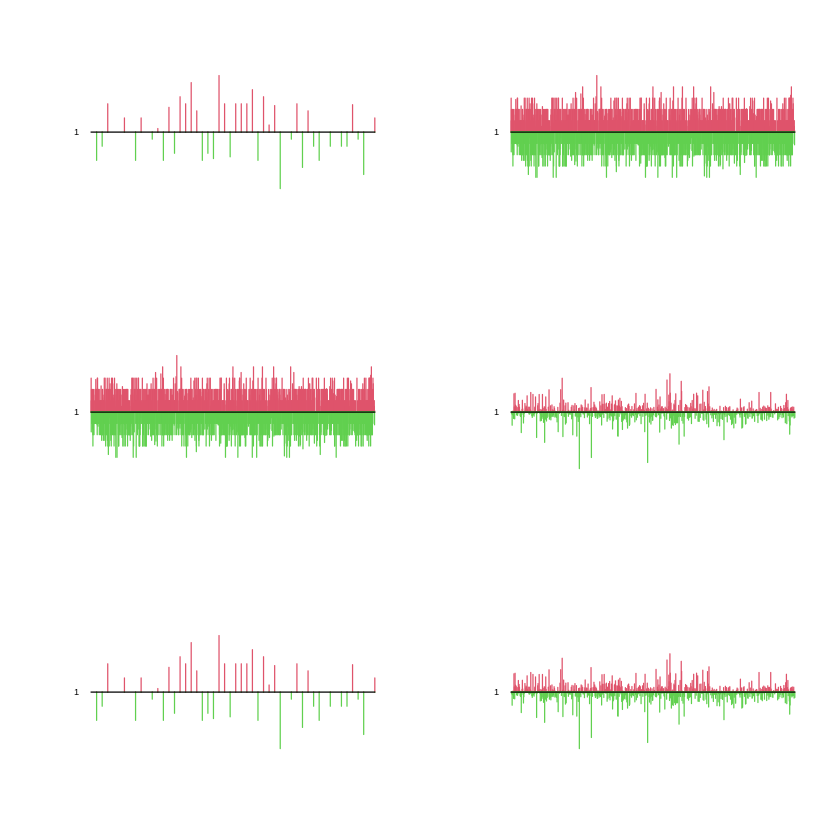

In [5]:
# TODO : What is really the proper representation?
par(mfrow=c(3,2))
PMA::PlotCGH(results_cca_mirna_rna$xcenter)
PMA::PlotCGH(results_cca_mirna_rna$ycenter)
PMA::PlotCGH(results_cca_rna_protein$xcenter)
PMA::PlotCGH(results_cca_rna_protein$ycenter)
PMA::PlotCGH(results_cca_mirna_protein$xcenter)
PMA::PlotCGH(results_cca_mirna_protein$ycenter)

In [6]:
str(results_cca_mirna_protein)

List of 5
 $ cor    : num [1:3] 1 1 1
 $ xcoef  : num [1:3, 1:3] -0.756 -0.543 -0.864 0.307 -0.277 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "MIMAT0000103" "MIMAT0000268" "MIMAT0000281"
  .. ..$ : NULL
 $ ycoef  : num [1:3, 1:3] -0.392 1.213 -1.216 0.577 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "A0FGR8" "O00154" "O00159"
  .. ..$ : NULL
 $ xcenter: Named num [1:51] -2.78e-17 -1.39e-17 2.78e-17 0.00 0.00 ...
  ..- attr(*, "names")= chr [1:51] "MIMAT0000103" "MIMAT0000268" "MIMAT0000281" "MIMAT0000417" ...
 $ ycenter: Named num [1:777] -2.78e-17 -5.55e-17 -4.09e-16 -8.33e-17 2.78e-17 ...
  ..- attr(*, "names")= chr [1:777] "A0FGR8" "O00154" "O00159" "O00161" ...
